# Check Bounding Boxex NIH

In [60]:
import os
import glob
import pandas as pd
import xml.etree.ElementTree as ET
from os import listdir
from os.path import isfile, join
import sys
import cv2
from tqdm import tqdm
import matplotlib.pyplot as plt
import matplotlib.image as mpimg
import numpy as np
from ftplib import FTP
from sklearn.metrics import average_precision_score
from sklearn.metrics import precision_recall_curve
from sklearn.metrics import plot_precision_recall_curve
sys.path.insert(0, os.path.dirname(os.path.abspath('.'))) # to make imports relative to project root work

First download files from ftp://lhcftp.nlm.nih.gov/Open-Access-Datasets/Malaria/NIH-NLM-ThinBloodSmearsPf/ to folder e.g.

--NIH_NLM_ThinBloodSmears <br>
---Point Set <br>
---Polygon Set <br>
--Notebooks <br>
---NIH_bounding_boxes.ipynb <br>

wget -r -np  ftp://gdo152.ucllnl.org/cowc/datasets/ground_truth_sets


In [61]:
img_path = '../NIH-NLM-ThinBloodSmearsPf/' + 'Point Set/' + '380C241NThinF/' + 'Img/' + 'IMG_20151207_124358.jpg'
gt_path = '../NIH-NLM-ThinBloodSmearsPf/' + 'Point Set/' + '380C241NThinF/' + 'GT/' + 'IMG_20151207_124358.txt'

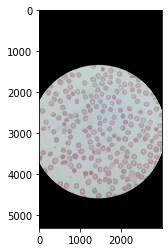

In [62]:
img = cv2.imread(img_path, cv2.IMREAD_COLOR)
plt.imshow(img)

In [65]:
df = pd.read_csv(gt_path, sep = ',', header = 0, names= [ '?','cell', 'comment', 'annotation_type','??', 'y', 'x'])
df

,?,cell,comment,annotation_type,??,y,x
0,5-1,Platelet,No_Comment,Point,1,2465.85,258.20
1,5-10,Uninfected,No_Comment,Point,1,3035.95,271.05
2,5-100,Uninfected,No_Comment,Point,1,1432.50,1497.00
3,5-101,Uninfected,No_Comment,Point,1,2103.55,1232.45
4,5-102,Uninfected,No_Comment,Point,1,1929.35,1284.10
...,...,...,...,...,...,...,...
195,5-95,Uninfected,No_Comment,Point,1,1235.70,1377.65
196,5-96,Uninfected,No_Comment,Point,1,1145.35,1461.55
197,5-97,Uninfected,No_Comment,Point,1,1703.50,1267.95
198,5-98,Uninfected,No_Comment,Point,1,1632.50,1438.95


In [71]:
def draw_points(img, x, y):
    print(int(x), int(y))
    cv2.circle(img, (int(x), int(y)), 1, (0,255,0), 3)
    plt.imshow(img)
    
df.apply(lambda row: draw_points(img, row['x'], row['y']), axis = 1)
plt.imshow(img)


258 2465


TypeError: Argument 'radius' is required to be an integer

In [ ]:
def from_yolo_to_cor(box, shape):
    img_h, img_w, _ = shape
    # x1, y1 = ((x + witdth)/2)*img_width, ((y + height)/2)*img_height
    # x2, y2 = ((x - witdth)/2)*img_width, ((y - height)/2)*img_height
    x1, y1 = int((box[0] + box[2]/2)*img_w), int((box[1] + box[3]/2)*img_h)
    x2, y2 = int((box[0] - box[2]/2)*img_w), int((box[1] - box[3]/2)*img_h)
    return x1, y1, x2, y2
    
def draw_boxes(img, box):
    #for box in boxes:
    x1, y1, x2, y2 = from_yolo_to_cor(box, img.shape)
    cv2.rectangle(img, (x1, y1), (x2, y2), (0,255,0), 3)
    #plt.figure(figsize = (20,20))
    plt.imshow(img)

for box in dict_pred[filename]:
    x1, y1, x2, y2 = from_yolo_to_cor(box, imReference.shape)
    cv2.rectangle(imReference, (x1, y1), (x2, y2), (255,140,0), 3)
    plt.figure(figsize = (20,20))
for box in dict_gt[filename]:
    x1, y1, x2, y2 = from_yolo_to_cor(box, imReference.shape)
    cv2.rectangle(imReference, (x1, y1), (x2, y2), (0,255,0), 3)
    plt.figure(figsize = (20,20))